In [1]:
import numpy as np
import matplotlib.pyplot as plt
import dill
from statsmodels.distributions.empirical_distribution import ECDF
from matplotlib import rcParams
import seaborn

plt.rc('text', usetex=True)
plt.rc('font', family='serif')
rcParams.update({'figure.autolayout': True})
seaborn.set_style("ticks")

%matplotlib inline  


In [189]:
s_graphs=False
name_algo='ieee14'
# name_algo='ieee300'
# name_algo='pegase'
folder='uptime'

In [190]:
results_s={}
days=[1,2,4,5,6]
# days=[1,2,5,6]
days_name=['Day 1','Day 2','Day 3','Day 4','Day 5']
days_name_print=['Day1','Day2','Day3','Day4','Day5']
for i in days:
    if name_algo=='ieee14':
        path_algo="eval/ieee14/Stoch_hybrid_ieee14_1000iter_3pwl_relaxation_False_cluster_warm_start_1_alpha50norm_u_0_gamma_10_evalgamma_10_day_"+str(i)+"_mult_25_parallel_newmix_quad_bugfix_ontime.p"
    elif name_algo=='ieee300':
        path_algo="eval/ieee300/uptime/Stoch_hybrid_ieee300_300iter_3pwl_relaxation_False_cluster_warm_start_1_alpha50norm_u_0_gamma_10_evalgamma_10_day_"+str(i)+"_mult_10_parallel_newmix_quad_bugfix.p"
    elif name_algo=='pegase':
#         path_algo="eval/pegase/uptime/Stoch_hybrid_pegase_100iter_3pwl_relaxation_False_cluster_warm_start_1_alpha50norm_u_0_gamma_10_evalgamma_10_day_"+str(i)+"_mult_10parallel_quad_chunk.p"
        path_algo="eval/pegase/uptime/Stoch_hybrid_pegase_10iter_3pwl_relaxation_False_cluster_warm_start_1_alpha50norm_u_0_gamma_10_evalgamma_10_day_"+str(i)+"_mult_10series_quad_chunk.p"
    results_s[str(i)]=dill.load( open(path_algo, "rb" ) )
 

In [191]:
results_b={}
for i in days:
    if name_algo=='ieee14':
        if i== 3:
            path_algo="eval/ieee14/day/new/Stoch_benders_ieee14_300iter_3pwl_relaxation_False_cluster_warm_start_1_alpha50norm_u_0_gamma_10_evalgamma_10_day_"+str(i)+"_mult_25_parallel_newmix_quad.p"
        else:
            path_algo="eval/ieee14/uptime/Stoch_benders_ieee14_400iter_3pwl_relaxation_False_cluster_warm_start_1_alpha50norm_u_0_gamma_10_evalgamma_10_day_"+str(i)+"_mult_25_parallel_newmix_quad_bugfix_ontime.p"      
    elif name_algo=='ieee300':
        if i ==3:
            path_algo="eval/ieee300/day/new/Stoch_benders_ieee300_50iter_3pwl_relaxation_False_cluster_warm_start_1_alpha50norm_u_0_gamma_10_evalgamma_10_day_"+str(i)+"_mult_10_parallel_newmix_quad.p"
        else:
            path_algo="eval/ieee300/uptime/Stoch_benders_ieee300_100iter_3pwl_relaxation_False_cluster_warm_start_1_alpha50norm_u_0_gamma_10_evalgamma_10_day_"+str(i)+"_mult_10_parallel_newmix_quad_bugfix.p"
    if name_algo!='pegase':
        results_b[str(i)]=dill.load( open(path_algo, "rb" ) )
 

In [192]:
# results_s[str(i)]['k_save']

In [193]:
if name_algo!='ieee14':
    t0={}
    for i in days:
        t0[str(i)]=np.cumsum(results_s[str(i)]['iter_time_total'])
    val={}
    for idx, i in enumerate(days):
        Q_0=np.nanmean(results_s[str(i)]['Q_dict'][str(0)])
        val[str(i)]=[(np.nanmean(results_s[str(i)]['Q_dict'][str(k)]-Q_0)/Q_0*100) for k in range(len(results_s[str(i)]['Q_dict']))]
    val_t={}
    for i in days:
        val_t[str(i)]=np.zeros(len(t0[str(i)]))
        val_t[str(i)][results_s[str(i)]['k_save']]=val[str(i)]
        for j in range (1,len(t0[str(i)])):
            if val_t[str(i)][j]==0:
                val_t[str(i)][j]=val_t[str(i)][j-1]
else:    
    t0={}
    for i in days:
        t0[str(i)]=np.cumsum(results_s[str(i)]['time_eval'])
if name_algo!='pegase':
    t0_b={}
    for i in days:
        t0_b[str(i)]=np.cumsum(results_b[str(i)]['time_eval'])

In [194]:
# results_s[str(1)].keys()

In [195]:
f_size=22
l_size=18
l_width=3
# colors=['#a6cee3','#1f78b4','#b2df8a','#33a02c','#e31a1c']
colors=['#a6cee3','#1f78b4','#e66101','#33a02c','#e31a1c']
# ['#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c']

In [196]:
s_graphs=False

In [197]:
if name_algo!='ieee14':
    nn=1
    fig, ax = plt.subplots(figsize=(5,5))
    for idx, i in enumerate(days):
        Q_0=np.nanmean(results_s[str(i)]['Q_dict'][str(0)])
        plt.plot(t0[str(i)][0::nn]/60,val_t[str(i)][0::nn],
             color=colors[idx],
             linewidth=l_width,
             marker='^', 
             markersize=l_width*2,
            label=str(i)
            )
    plt.plot([0,500],np.zeros(2),'k',linewidth=l_width,linestyle='dashed')
    # plt.legend(loc='best')
    plt.xlabel(r'construction time [min]',fontsize=f_size)
    plt.ylabel(r'relative cost [\%]',fontsize=f_size)
    plt.tick_params(axis='both',which='major',labelsize=l_size)
    plt.tick_params(axis='both',which='minor',labelsize=l_size)
    plt.grid(True)
    if name_algo=='ieee14':
        plt.ylim([-60,2])
        plt.xlim([0,3])
    if name_algo=='ieee300':
        plt.ylim([-0.6,0.05])
        plt.xlim([0,18])
    if name_algo=='pegase':
        plt.ylim([-0.3,0.2])
        plt.xlim([0,160])
    if s_graphs:
        plt.savefig('./images/'+name_algo+'/'+folder+'/days_AdaCE.pdf',bbox_inches='tight',dpi=300)

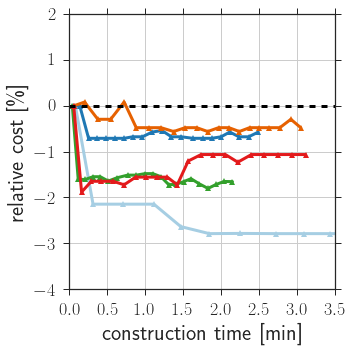

In [198]:
if name_algo=='ieee14':
    nn=1
    fig, ax = plt.subplots(figsize=(5,5))
    for idx, i in enumerate(days):
        Q_0=np.nanmean(results_s[str(i)]['Q_dict'][str(0)])
        plt.plot(t0[str(i)][0::nn]/60,[ (np.nanmean(results_s[str(i)]['Q_dict'][str(k)]-Q_0)/Q_0*100) 
                                for k in range(len(results_s[str(i)]['Q_dict']))][0::nn],
             color=colors[idx],
             linewidth=l_width,
             marker='^', 
             markersize=l_width*2,
            label=str(i)
            )
    plt.plot([0,500],np.zeros(2),'k',linewidth=l_width,linestyle='dashed')
    # plt.legend(loc='best')
    plt.xlabel(r'construction time [min]',fontsize=f_size)
    plt.ylabel(r'relative cost [\%]',fontsize=f_size)
    plt.tick_params(axis='both',which='major',labelsize=l_size)
    plt.tick_params(axis='both',which='minor',labelsize=l_size)
    plt.grid(True)
    if name_algo=='ieee14':
        plt.ylim([-4,2])
        plt.xlim([0,3.5])
    if name_algo=='ieee300':
        plt.ylim([-0.5,0.2])
        plt.xlim([0,16])
    if name_algo=='pegase':
        plt.ylim([-1.1,0.2])
        plt.xlim([0,180])
    if s_graphs:
        plt.savefig('./images/'+name_algo+'/'+folder+'/days_AdaCE.pdf',bbox_inches='tight',dpi=300)

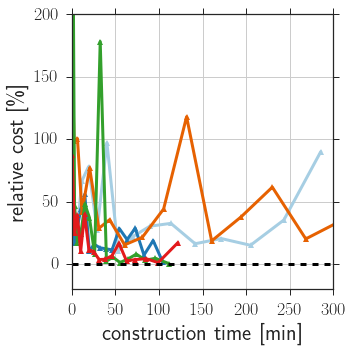

In [199]:
days=[1,2,4,5,6]
if name_algo!='pegase':
    if name_algo=='ieee300':
        nn=1
    elif name_algo=='ieee14':
        nn=5
    fig, ax = plt.subplots(figsize=(5,5))
    for idx,i in enumerate(days):
        Q_0=np.nanmean(results_s[str(i)]['Q_dict'][str(0)])
        plt.plot(t0_b[str(i)][0::nn]/60,[ (np.nanmean(results_b[str(i)]['Q_dict'][str(k)]-Q_0)/Q_0*100) 
                                for k in range(len(results_b[str(i)]['Q_dict']))][0::nn],
             color=colors[idx],
             linewidth=l_width,
             marker='^', 
             markersize=l_width*2,
            label=str(i)
            )
    plt.plot([0,300],np.zeros(2),'k',linewidth=l_width,linestyle='dashed')
    plt.xlabel(r'construction time [min]',fontsize=f_size)
    plt.ylabel(r'relative cost [\%]',fontsize=f_size)
    plt.tick_params(axis='both',which='major',labelsize=l_size)
    plt.tick_params(axis='both',which='minor',labelsize=l_size)
    plt.grid(True)
    if name_algo=='ieee14':
        plt.ylim([-20,200])
        plt.xlim([0,300])
    if name_algo=='ieee300':
        plt.ylim([-20,500])
        plt.xlim([0,300])
    if s_graphs:
        plt.savefig('./images/'+name_algo+'/'+folder+'/days_benders.pdf',bbox_inches='tight',dpi=300)

In [200]:
n=1
for idx,i in enumerate(days):
    Q_0=np.nanmean(results_s[str(i)]['Q_dict'][str(0)])
    print i, np.min([ (np.nanmean(results_b[str(i)]['Q_dict'][str(k)]-Q_0)/Q_0*100) 
                                for k in range(len(results_b[str(i)]['Q_dict']))][0::n])

1 8.15859944369
2 1.7671058105
4 8.86707161309
5 0.229387748058
6 -0.544178320559


In [201]:
if False:
    legends=['AdaCE','Benders','CE']
    plt.figure(figsize=(5,5))
    ax = plt.gca()
    for idx, i in enumerate(days):
        plt.plot([0,1],[0,idx],color=colors[idx],label=days_name[idx])
    plt.plot([0,1],[0,1],'k',label='CE',linestyle='dashed')
    legend_fig = plt.figure(figsize=(14,1.))
    lgd = plt.figlegend(*ax.get_legend_handles_labels(),loc='center',ncol=3,fontsize=30)
    for legobj in lgd.legendHandles:
        legobj.set_linewidth(5.0)
    legend_fig.savefig('images/legend_days.pdf')

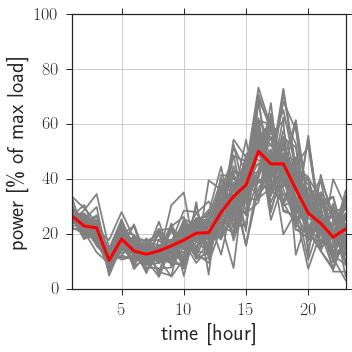

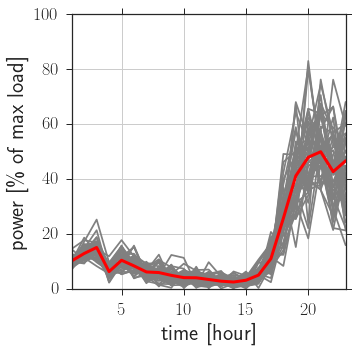

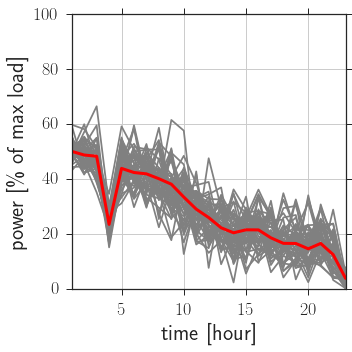

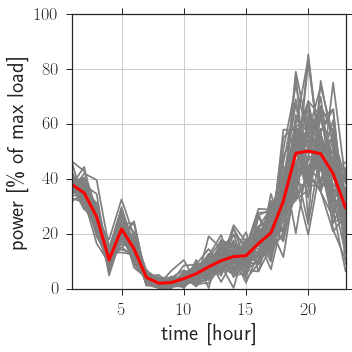

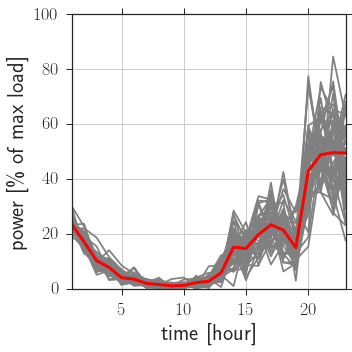

In [202]:
# i=3
for idx,i in enumerate(days): 
    aa=i
    if name_algo=='ieee14':
        path_algo="pickle/ieee14/day/Stoch_hybrid_ieee14_1000iter_3pwl_relaxation_False_cluster_warm_start_1_alpha50norm_u_0_gamma_10_evalgamma_10_day_"+str(i)+"_mult_25_parallel_newmix_quad_bugfix_ontime.p"
    elif name_algo=='ieee300':
        path_algo="pickle/ieee300/day/Stoch_hybrid_ieee300_300iter_3pwl_relaxation_False_cluster_warm_start_1_alpha50norm_u_0_gamma_10_evalgamma_10_day_"+str(i)+"_mult_10_parallel_newmix_quad.p"
    elif name_algo=='pegase':
        path_algo="pickle/pegase/day/Stoch_hybrid_pegase_100iter_3pwl_relaxation_False_cluster_warm_start_1_alpha50norm_u_0_gamma_10_evalgamma_10_day_"+str(i)+"_mult_10_parallel_quad_chunk.p"
    res=dill.load( open(path_algo,"rb"))
    for res1 in res.keys():
        exec (res1 + "= res[res1]")
    for var in variables.keys():
        exec (var + "= variables[var]")
    for cons in constants.keys():
        exec (cons + "= constants[cons]") 
    plt.figure(figsize=(5,5))
    for j in range (50):
        plt.plot((sum(scenarios_bus[:,:,j])/np.max(sum(b)))*100,color='gray')
    plt.plot((np.sum(np.mean(scenarios_bus,2),0)/np.max(sum(b)))*100,color='r',linewidth=l_width)
    plt.ylabel(r'power [\% of max load]',fontsize=f_size)
    plt.xlabel(r'time [hour]',fontsize=f_size)
    plt.xlim([1,n_h-1])
    plt.ylim([0,100])
    plt.tick_params(axis='both',which='major',labelsize=l_size)
    plt.tick_params(axis='both',which='minor',labelsize=l_size)
    plt.grid(True)
#     plt.savefig('./images/'+name_algo+'/'+folder+'/wind'+days_name_print[idx]+'.pdf',bbox_inches='tight',dpi=300)
#     plt.show()

In [203]:
s_graphs=False

In [204]:
# folder='new'
# colors=['#7fcdbb']
# for idx,i in enumerate(days): 
#     load_data=np.genfromtxt('BPA_data/day'+str(i)+'.csv',delimiter=',',names=True)
#     plt.figure(figsize=(5,5))
#     x_r=range(1,len(load_data['load'])+1)
#     plt.fill_between(x_r,np.zeros(24) ,load_data['load']*100,linewidth=0.0,color=colors[0])
#     plt.ylabel(r'power [\% of max load]',fontsize=f_size)
#     plt.xlabel(r'time [hour]',fontsize=f_size)
#     plt.xlim([1,n_h])
#     plt.ylim([0,120])
#     plt.tick_params(axis='both',which='major',labelsize=l_size)
#     plt.tick_params(axis='both',which='minor',labelsize=l_size)
#     plt.grid(True)
#     plt.savefig('./images/'+name_algo+'/'+folder+'/load'+days_name_print[idx]+'.pdf',bbox_inches='tight',dpi=300)
#     plt.show()

In [205]:
# colors=['r','grey']
# legends=['Expected','Sampled']
# plt.figure(figsize=(5,5))
# ax = plt.gca()
# for idx,c in enumerate(colors):
#     plt.plot([0,1],[0,1],color=c,label=legends[idx])
# legend_fig = plt.figure(figsize=(14,0.5))
# lgd = plt.figlegend(*ax.get_legend_handles_labels(),loc='center',ncol=2,fontsize=30)
# for legobj in lgd.legendHandles:
#     legobj.set_linewidth(5.0)
# legend_fig.savefig('images/legend4.pdf')

In [182]:
s_graphs=True

In [206]:
kk=4
i=days[kk]
aa=i
if name_algo=='ieee14':
    path_algo="pickle/ieee14/day/Stoch_hybrid_ieee14_1000iter_3pwl_relaxation_False_cluster_warm_start_1_alpha50norm_u_0_gamma_10_evalgamma_10_day_"+str(i)+"_mult_25_parallel_newmix_quad_bugfix_ontime.p"
elif name_algo=='ieee300':
    path_algo="pickle/ieee300/uptime/Stoch_hybrid_ieee300_300iter_3pwl_relaxation_False_cluster_warm_start_1_alpha50norm_u_0_gamma_10_evalgamma_10_day_"+str(i)+"_mult_10_parallel_newmix_quad_bugfix.p"
elif name_algo=='pegase':
    path_algo="pickle/pegase/day/Stoch_hybrid_pegase_100iter_3pwl_relaxation_False_cluster_warm_start_1_alpha50norm_u_0_gamma_10_evalgamma_10_day_"+str(i)+"_mult_10_parallel_quad_chunk.p"
res=dill.load( open(path_algo,"rb"))
for res1 in res.keys():
    exec (res1 + "= res[res1]")
for var in variables.keys():
    exec (var + "= variables[var]")
for cons in constants.keys():
    exec (cons + "= constants[cons]") 

In [207]:
# import matplotlib.ticker as plticker

Day5


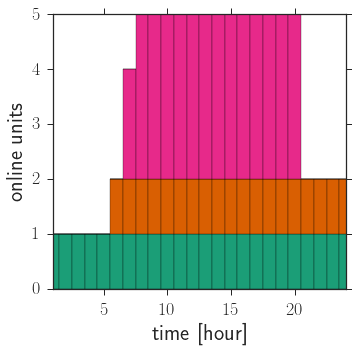

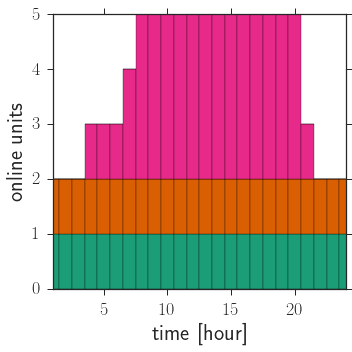

In [208]:
a_list=[0,len(res['on_off_array'])-1]
Ada=['CE','AdaCE']
print days_name_print[kk]
for idxx, i in enumerate(a_list):
    o_test=res['on_off_array'][i]
    sorted_name_techno=['Nuclear','IGCC','Coal','CCGT','OCGT']
    N = n_h
    ind = np.arange(0.5,N+0.5)  # the x locations for the groups
    width = 1
    aux=[]
    aux.append(np.zeros(N).T)
    cumsum_aux=np.zeros(N)
    fig, ax = plt.subplots(figsize=(5,5))
    # rects = ax.bar(ind, strategy1_optMean, width, color=color[0])
    colors=['#1b9e77','#d95f02','#7570b3','#e7298a','#66a61e']
    for idx,name in enumerate(sorted_name_techno):
    #     print name
        aux.append(np.array([np.sum(np.ceil(o_test[j,i]) for j in range (num_p) if gen_tech[j]==name) for i in range(n_h)]))
        cumsum_aux=np.cumsum(aux,0)
    #     print aux[-1]
        rects = ax.bar(ind, aux[idx+1], width, color=colors[idx],bottom=cumsum_aux[idx],label=sorted_name_techno[idx])
    # plt.legend(sorted_name_techno,loc='best')  
    plt.xlim([1,N])
    plt.xlabel(r'time [hour]',fontsize=f_size)
    plt.ylabel(r'online units',fontsize=f_size)
    plt.tick_params(axis='both',which='major',labelsize=l_size)
    plt.tick_params(axis='both',which='minor',labelsize=l_size)
    
#     intervals = float(1)
#     loc = plticker.MultipleLocator(base=intervals)
#     ax.xaxis.set_major_locator(loc)
#     ax.yaxis.set_major_locator(loc)
    
#     plt.grid(True)
    if s_graphs:
        plt.savefig('./images/'+name_algo+'/'+folder+'/online'+Ada[idxx]+'_'+days_name_print[kk]+'.pdf',bbox_inches='tight',dpi=300)

In [209]:
np.sum(on_off_array[-1]!=on_off_array[0],0)

matrix([[1, 1, 1, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
         0, 0]])

In [215]:
s_graphs=True

In [216]:
def plot_demand(p,load,s,r,b,n_h,a=0):
    colors=['#d7191c','#fdae61','#abdda4','#2b83ba'] #['#ef8a62','#f7f7f7','#67a9cf','#008837']
    plt.figure(figsize=(5,5))
    ax = plt.gca()
    x_range=range(1,n_h+1)
#     f=1
    plt.fill_between(x_range,np.zeros(n_h),np.squeeze(np.asarray(sum(p)))/np.max(sum(b))*100,color=colors[3],label='Generation')
    plt.fill_between(x_range,np.squeeze(np.asarray(sum(p)))/np.max(sum(b))*100,
                     np.squeeze(np.asarray(sum(p)+sum(s)))/np.max(sum(b))*100,
                     color=colors[1])

    plt.fill_between(x_range,np.squeeze(np.asarray(sum(b)))/np.max(sum(b))*100,
                     np.squeeze(np.asarray(sum(load)))/np.max(sum(b))*100,
                     color=colors[0],
                     linewidth=0.0)
#     plt.plot(x_range,np.squeeze(np.asarray(sum(b))),color='k',linewidth=3.0,label='Demand')
    plt.fill_between(x_range,np.zeros(n_h),-np.squeeze(np.asarray((-sum(s)+sum(r))))/np.max(sum(b))*100,color=colors[2])
#     plt.legend(['Demand','Generation','Renewable used','Demand not served','Renewable curtailed'],loc='best')
    plt.xlim([1,n_h])
    plt.ylim([-10,110])
    plt.ylabel(r'expected power [\% of max load]',fontsize=f_size)
    plt.xlabel(r'time [hour]',fontsize=f_size)
    plt.tick_params(axis='both',which='major',labelsize=l_size)
    plt.tick_params(axis='both',which='minor',labelsize=l_size)
    if s_graphs:
        plt.savefig('./images/'+name_algo+'/'+folder+'/demand'+Ada[a]+'_'+days_name_print[kk]+'.pdf',bbox_inches='tight',dpi=300)
    plt.show()
#     return ax

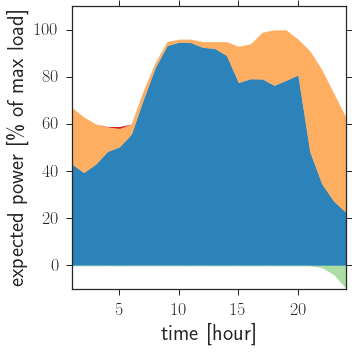

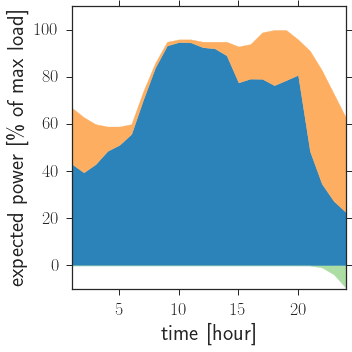

In [217]:
for a in range(2):
    plot_demand(p=results_s[str(days[kk])]['p_dict'][str(a_list[a])],
                load=results_s[str(days[kk])]['load_dict'][str(a_list[a])],
                s=results_s[str(days[kk])]['s_dict'][str(a)],
                r=np.mean(scenarios_bus[:,:,n_test:n_test+n_samples],2),b=b,n_h=n_h,a=a)

In [212]:
# a=10
# plt.plot(np.squeeze(np.asarray(sum(b)))- np.squeeze(np.asarray(sum(results_s[str(aa)]['load_dict'][str(a)]))) )
# a=0
# plt.plot(np.squeeze(np.asarray(sum(b)))- np.squeeze(np.asarray(sum(results_s[str(aa)]['load_dict'][str(a)]))) )
# plt.show()

In [213]:
s_graphs=False

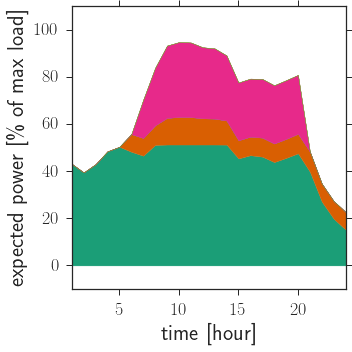

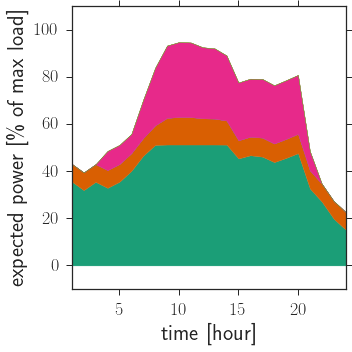

In [218]:
for o in range(2):
    a=a_list[o]
    total_p_gen=np.sum(p.value,1)
    total_share=[]
    n_gen_per_tech=[]
    # for name in name_techno:
    #     total_share.append((name,np.sum([ total_p_gen[i] for i in range(num_p) if gen_tech[i]==name  ])))
    # print total_share
    # sorted_name_techno=[x[0] for x in sorted(total_share,key =lambda x: x[1],reverse=True)]
    sorted_name_techno=['Nuclear','IGCC','Coal','CCGT','OCGT']
    colors=['#1b9e77','#d95f02','#7570b3','#e7298a','#66a61e']#list((['#f0f9e8','#bae4bc','#7bccc4','#43a2ca','#0868ac']))
    share_per_hour=np.zeros([len(sorted_name_techno)+1,n_h])
    plt.figure(figsize=(5,5))
    for idx,name in enumerate(sorted_name_techno):
        share_per_hour[idx+1]=np.sum([ np.squeeze(np.asarray(results_s[str(days[kk])]['p_dict'][str(a)][i])) for i in range(num_p) if gen_tech[i]==name ],0)
    share_per_hour_cumsum=np.cumsum(share_per_hour/np.max(sum(b))*100,0)
    for idx,name in enumerate(sorted_name_techno):
        plt.fill_between(range(1,n_h+1),share_per_hour_cumsum[idx],share_per_hour_cumsum[idx+1],color=colors[idx],)
    plt.ylabel(r'expected power [\% of max load]',fontsize=f_size)
    plt.xlabel(r'time [hour]',fontsize=f_size)
    plt.xlim([1,n_h])
    plt.ylim([-10,110])
    plt.tick_params(axis='both',which='major',labelsize=l_size)
    plt.tick_params(axis='both',which='minor',labelsize=l_size)
    if s_graphs:
        plt.savefig('./images/'+name_algo+'/'+folder+'/demand_tech'+Ada[o]+'_'+days_name_print[kk]+'.pdf',bbox_inches='tight',dpi=300)
    plt.show()

for idx, name in enumerate(sorted_name_techno):
    n_gen_per_tech.append(sum([1 for i in range(num_p) if gen_tech[i]==name]))

[]

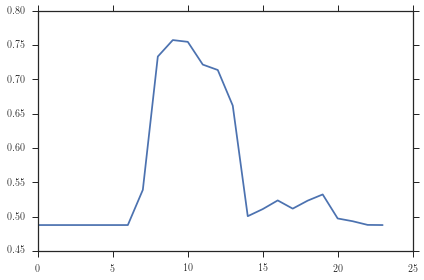

In [76]:
plt.plot(share_per_hour[2])
plt.plot()